In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import logging

In [2]:
from cpymad import madx as cpymadx
from pytrain.cpymad import *

In [3]:
from pytrain.twiss import *
from pytrain.machine import *
from pytrain.solver import solve_train

In [4]:
logging.basicConfig(level='INFO')

In [5]:
import sys
madx = cpymadx.Madx(stdout=cpymadx.TextCallback(sys.stdout.write))


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.09.00  (64 bit, Linux)       +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2023.05.05               +
  + Execution date: 2023.11.09 17:03:15      +
  ++++++++++++++++++++++++++++++++++++++++++++


In [6]:
modeldir = fetch_git_optics_model('gitlab+https://gitlab.cern.ch/acc-models/acc-models-lhc@v2023.6')
madx.chdir(modeldir.name)
madx.options.echo = False
madx.options.info = False

INFO:pytrain.cpymad:Downloading model from https://gitlab.cern.ch/acc-models/acc-models-lhc/-/archive/v2023.6/acc-models-lhc-v2023.6.zip


In [7]:
madx.call('acc-models-lhc/lhc.seq')
madx.call('acc-models-lhc/beams/pp_6800.madx')
#madx.call('acc-models-lhc/operation/optics/R2023a_A120cmC120cmA10mL200cm.madx')
madx.call('acc-models-lhc/operation/optics/R2023a_A30cmC30cmA10mL200cm.madx')

++++++ warning: implicit element re-definition ignored: ip1
++++++ warning: implicit element re-definition ignored: mbas2.1r1
++++++ warning: implicit element re-definition ignored: tas.1r1
++++++ warning: implicit element re-definition ignored: mqxa.1r1
++++++ warning: implicit element re-definition ignored: mcbxh.1r1
++++++ warning: implicit element re-definition ignored: mcbxv.1r1
++++++ warning: implicit element re-definition ignored: mqxb.a2r1
++++++ warning: implicit element re-definition ignored: mcbxh.2r1
++++++ warning: implicit element re-definition ignored: mcbxv.2r1
++++++ warning: implicit element re-definition ignored: mqxb.b2r1
++++++ warning: implicit element re-definition ignored: tasb.3r1
++++++ warning: implicit element re-definition ignored: mqsx.3r1
++++++ warning: implicit element re-definition ignored: mqxa.3r1
++++++ warning: implicit element re-definition ignored: mcbxh.3r1
++++++ warning: implicit element re-definition ignored: mcbxv.3r1
++++++ warning: implic

In [8]:
# IP 1 / 5
madx.globals.on_x1_v = -160
madx.globals.on_x5_h = 160

# IP 2 / 8
madx.globals.on_sep2h = -0.2
madx.globals.on_sep2v = 0
madx.globals.on_x2v = 200
madx.globals.on_sep8h = -0.05
madx.globals.on_sep8v = -0.025
madx.globals.on_x8v = 200

# spurious dispersion bumps
madx.globals.on_xx1_v = 'on_x1_v'
madx.globals.on_xx5_h = 'on_x5_h'
madx.globals.on_disp = 1

# spectrometers
madx.globals.on_alice = '7000/nrj'
madx.globals.on_lhcb = '-7000/nrj'

In [9]:
cpymad_lhc_makethin(madx, slicefactor=8)

makethin: style chosen : teapot
makethin: slicing sequence : lhcb1
makethin: style chosen : teapot
makethin: slicing sequence : lhcb2


In [10]:
# prepare model for train - cycle to IP3, install markers (named MKIPxx), reflect B2
cpymad_lhc_cycle(madx, start='IP3')
cpymad_lhc_install_bb_markers(madx, nparasitic=45)

GC Warning: Repeated allocation of very large block (appr. size 323584):
	May lead to memory leak and poor performance


++++++ warning: implicit element re-definition ignored: mkip1
++++++ warning: implicit element re-definition ignored: mkip2
++++++ warning: implicit element re-definition ignored: mkip5
++++++ warning: implicit element re-definition ignored: mkip8
++++++ warning: implicit element re-definition ignored: mkip1pl1
++++++ warning: implicit element re-definition ignored: mkip1pl2
++++++ warning: implicit element re-definition ignored: mkip1pl3
++++++ warning: implicit element re-definition ignored: mkip1pl4
++++++ warning: implicit element re-definition ignored: mkip1pl5
++++++ warning: implicit element re-definition ignored: mkip1pl6
++++++ warning: implicit element re-definition ignored: mkip1pl7
++++++ warning: implicit element re-definition ignored: mkip1pl8
++++++ warning: implicit element re-definition ignored: mkip1pl9
++++++ warning: implicit element re-definition ignored: mkip1pl10
++++++ warning: implicit element re-definition ignored: mkip1pl11
++++++ warning: implicit element re

In [11]:
# match tune / chroma to operational values
cpymad_lhc_match_tune_chroma(
    madx,
    qx_b1=62.313, qy_b1=60.317, 
    qx_b2=62.313, qy_b2=60.317,
    qpx_b1=20.0, qpy_b1=20.0,
    qpx_b2=20.0, qpy_b2=20.0
)

START MATCHING

++++++ warning: TWCPIN:  One-turn map R symplectic deviation:  0.351823E-11 (symplectifying R)                                                                                                               
number of variables:    2
user given constraints: 2
total constraints:      2

START LMDIF:

++++++ warning: TWCPIN:  One-turn map R symplectic deviation:  0.351823E-11 (symplectifying R)                                                                                                               
Initial Penalty Function =   0.17819859E-02


++++++ warning: TWCPIN:  One-turn map R symplectic deviation:  0.181567E-11 (symplectifying R)                                                                                                               
++++++ warning: TWCPIN:  One-turn map R symplectic deviation:  0.160208E-11 (symplectifying R)                                                                                                               
++++++ warning: TWCPI

In [12]:
machine, twiss_b1, twiss_b2, maps_b1, maps_b2 = cpymad_generate_train_maps(madx, extra_elements='^TCP\..*7\.')

enter Twiss module
  
iteration:   1 error:   3.968433E-08 deltap:   0.000000E+00
orbit:   5.206117E-08 -6.942629E-10 -9.645168E-08 -1.727043E-09  0.000000E+00  0.000000E+00
++++++ warning: TWCPIN:  One-turn map R symplectic deviation:  0.363400E-11 (symplectifying R)                                                                                                               

++++++ table: summ

            length             orbit5               alfa            gammatr 
        26658.8832                 -0    0.0003480342593         53.6029883 

                q1                dq1            betxmax              dxmax 
            62.313        20.00019489        8095.385856        2.858173863 

             dxrms             xcomax             xcorms                 q2 
       1.364380302     0.007822102642     0.001146708333             60.317 

               dq2            betymax              dymax              dyrms 
       19.99911088        8101.025349        1.247857246 

# Closed orbit - no BB

In [13]:
oneturn_b1 = oneturn_map(maps_b1)
oneturn_b2 = oneturn_map(maps_b2)

In [14]:
z1 = closed_orbit(oneturn_b1)
orbit1 = track_orbit(z1, maps_b1)

In [15]:
z2 = closed_orbit(oneturn_b2)
orbit2 = track_orbit(z2, maps_b2)

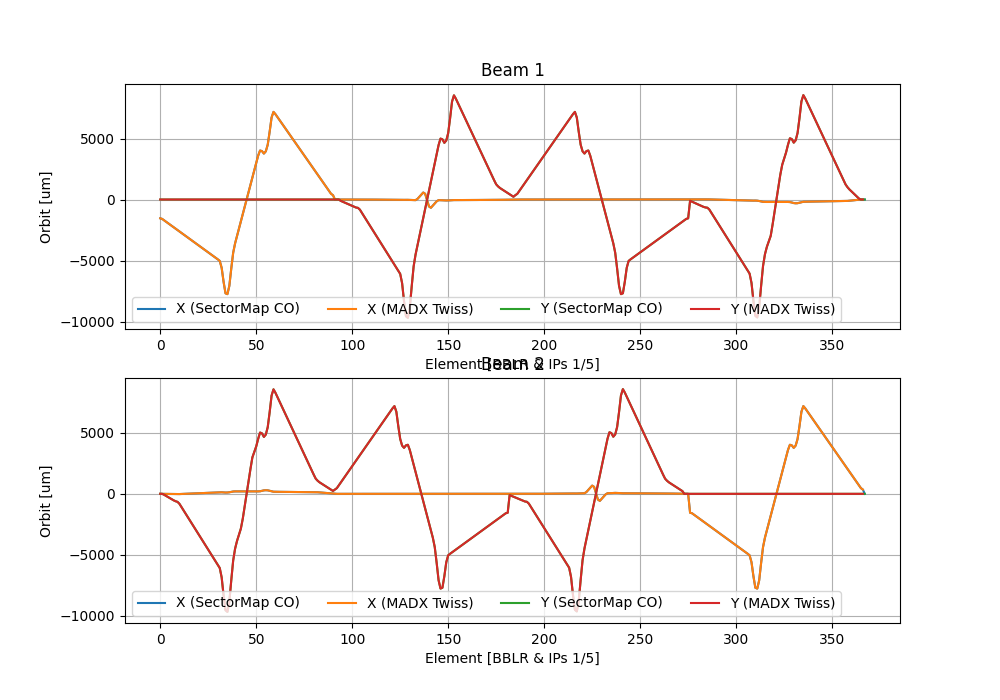

In [16]:
orbit1_arr = np.array(list(orbit1.values()))[:, [0,2]]
orbit2_arr = np.array(list(orbit2.values()))[:, [0,2]]

twiss_orbit1_arr = np.array([[t.X, t.Y] for e,t in twiss_b1.items() if e in maps_b1])
twiss_orbit2_arr = np.array([[t.X, t.Y] for e,t in twiss_b2.items() if e in maps_b2])

plt.figure(figsize=(10, 7))
plt.subplot(2,1,1)
plt.title('Beam 1')
plt.plot(orbit1_arr[:,0]*1e6)
plt.plot(twiss_orbit1_arr[:,0]*1e6)
plt.plot(orbit1_arr[:,1]*1e6)
plt.plot(twiss_orbit1_arr[:,1]*1e6)
plt.grid(True)
plt.legend(['X (SectorMap CO)', 'X (MADX Twiss)','Y (SectorMap CO)', 'Y (MADX Twiss)'], ncols=4)
plt.ylabel('Orbit [um]')
plt.xlabel('Element [BBLR & IPs 1/5]')

plt.subplot(2,1,2)
plt.title('Beam 2')
plt.plot(orbit2_arr[:,0]*1e6)
plt.plot(twiss_orbit2_arr[:,0]*1e6)
plt.plot(orbit2_arr[:,1]*1e6)
plt.plot(twiss_orbit2_arr[:,1]*1e6)
plt.grid(True)
plt.legend(['X (SectorMap CO)', 'X (MADX Twiss)','Y (SectorMap CO)', 'Y (MADX Twiss)'], ncols=4)
plt.ylabel('Orbit [um]')
plt.xlabel('Element [BBLR & IPs 1/5]')

plt.show()
plt.tight_layout()

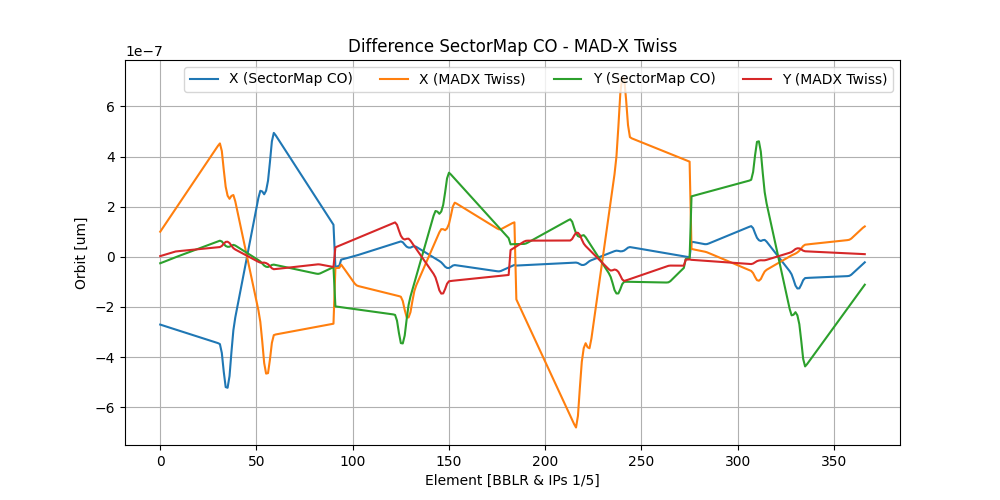

In [17]:
plt.figure(figsize=(10, 5))
plt.title('Difference SectorMap CO - MAD-X Twiss')
plt.plot(orbit1_arr[:-1,0]*1e6 - twiss_orbit1_arr[:,0]*1e6)
plt.plot(orbit1_arr[:-1,1]*1e6 - twiss_orbit1_arr[:,1]*1e6)
plt.plot(orbit2_arr[:-1,0]*1e6 - twiss_orbit2_arr[:,0]*1e6)
plt.plot(orbit2_arr[:-1,1]*1e6 - twiss_orbit2_arr[:,1]*1e6)
plt.grid(True)
plt.legend(['X (SectorMap CO)', 'X (MADX Twiss)','Y (SectorMap CO)', 'Y (MADX Twiss)'], ncols=4)
plt.ylabel('Orbit [um]')
plt.xlabel('Element [BBLR & IPs 1/5]')

plt.show()
plt.tight_layout()

In [18]:
tune(oneturn_b1, z1)

(0.3129999099701355, 0.3170000153972717)

In [19]:
tune(oneturn_b2, z2)

(0.31300014058281256, 0.31700004626621797)

In [20]:
chroma(oneturn_b1, z1)

(20.00022321245048, 19.999108152186203)

In [21]:
chroma(oneturn_b2, z2)

(20.000058922670313, 19.999508349076415)

# Filling Scheme

In [22]:
import requests
fs = requests.get('https://lpc.web.cern.ch/cgi-bin/selectScheme.py?schemeName=25ns_2374b_2361_1730_1773_236bpi_13inj_hybrid_2INDIV.csv&schemePath=%2Fdata%2FfillingSchemes%2F2023%2Fcandidates&relPath=..%2FfillingSchemes%2F2023%2Fcandidates').json()
buckets_b1 = np.squeeze(fs['data']['ring_1'])
buckets_b2 = np.squeeze(fs['data']['ring_2'])

In [23]:
filled_b1 = np.zeros((machine.num_slots,), dtype=bool)
filled_b2 = np.zeros((machine.num_slots,), dtype=bool)
filled_b1[buckets_b1 // 10] = True
filled_b2[buckets_b2 // 10] = True

In [24]:
int_b1 = filled_b1 * 1.0e11
int_b2 = filled_b2 * 1.0e11
emit_b1x = filled_b1 * 2.1e-6
emit_b1y = filled_b1 * 1.9e-6
emit_b2x = filled_b2 * 2.1e-6
emit_b2y = filled_b2 * 1.9e-6

In [25]:
filling_scheme = FillingScheme(int_b1, int_b2, emit_b1x, emit_b1y, emit_b2x, emit_b2y)

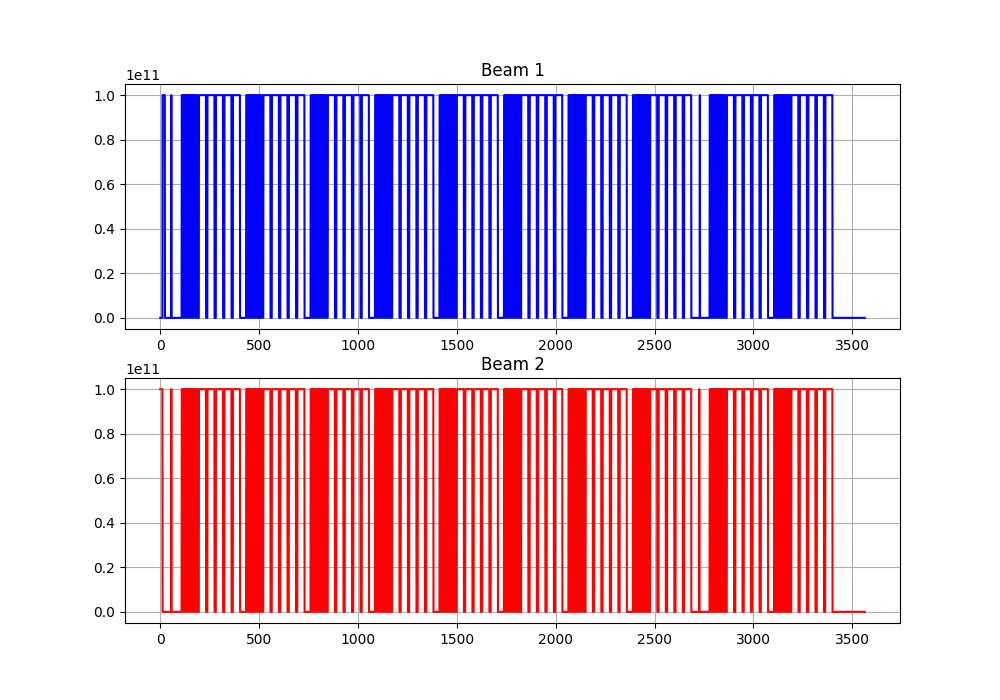

In [26]:
plt.figure(figsize=(10, 7))
plt.subplot(2,1,1)
plt.title('Beam 1')
plt.plot(filling_scheme.intensity_b1, 'b')
plt.grid(True)

plt.subplot(2,1,2)
plt.title('Beam 2')
plt.plot(filling_scheme.intensity_b2, 'r')
plt.grid(True)

plt.show()
plt.tight_layout()

# Closed orbit - bunch by bunch with BB

In [27]:
result = solve_train(machine, filling_scheme, twiss_b1, maps_b1, twiss_b2, maps_b2)

INFO:pytrain.solver:Starting iteration 1 - Beam 1


Iteration 1 - Beam 1:   0%|          | 0/2374 [00:00<?, ?it/s]

INFO:pytrain.solver:Starting iteration 1 - Beam 2


Iteration 1 - Beam 2:   0%|          | 0/2374 [00:00<?, ?it/s]

INFO:pytrain.solver:Iteration 1 done: max. closed-orbit error B1 / B2 = 6.1731e-05 / 7.5940e-05
INFO:pytrain.solver:Starting iteration 2 - Beam 1


Iteration 2 - Beam 1:   0%|          | 0/2374 [00:00<?, ?it/s]

INFO:pytrain.solver:Starting iteration 2 - Beam 2


Iteration 2 - Beam 2:   0%|          | 0/2374 [00:00<?, ?it/s]

INFO:pytrain.solver:Iteration 2 done: max. closed-orbit error B1 / B2 = 3.2808e-06 / 5.8209e-07
INFO:pytrain.solver:Starting iteration 3 - Beam 1


Iteration 3 - Beam 1:   0%|          | 0/2374 [00:00<?, ?it/s]

INFO:pytrain.solver:Starting iteration 3 - Beam 2


Iteration 3 - Beam 2:   0%|          | 0/2374 [00:00<?, ?it/s]

INFO:pytrain.solver:Iteration 3 done: max. closed-orbit error B1 / B2 = 2.2340e-08 / 5.6580e-09
INFO:pytrain.solver:Starting iteration 4 - Beam 1


Iteration 4 - Beam 1:   0%|          | 0/2374 [00:00<?, ?it/s]

INFO:pytrain.solver:Starting iteration 4 - Beam 2


Iteration 4 - Beam 2:   0%|          | 0/2374 [00:00<?, ?it/s]

INFO:pytrain.solver:Iteration 4 done: max. closed-orbit error B1 / B2 = 2.0859e-10 / 5.5537e-11


In [28]:
co_b1_x, co_b1_y = result.bunch_positions_b1('MKIP5')
co_b2_x, co_b2_y = result.bunch_positions_b2('MKIP5')

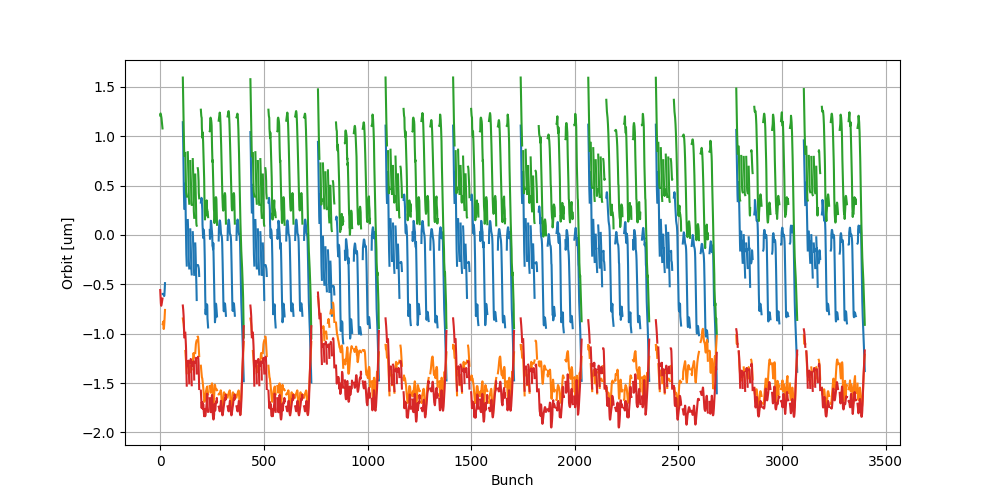

In [29]:
plt.figure(figsize=(10, 5))
plt.plot(co_b1_x*1e6)
plt.plot(co_b1_y*1e6)
plt.plot(co_b2_x*1e6)
plt.plot(co_b2_y*1e6)
plt.grid(True)
plt.ylabel('Orbit [um]')
plt.xlabel('Bunch')
plt.show()

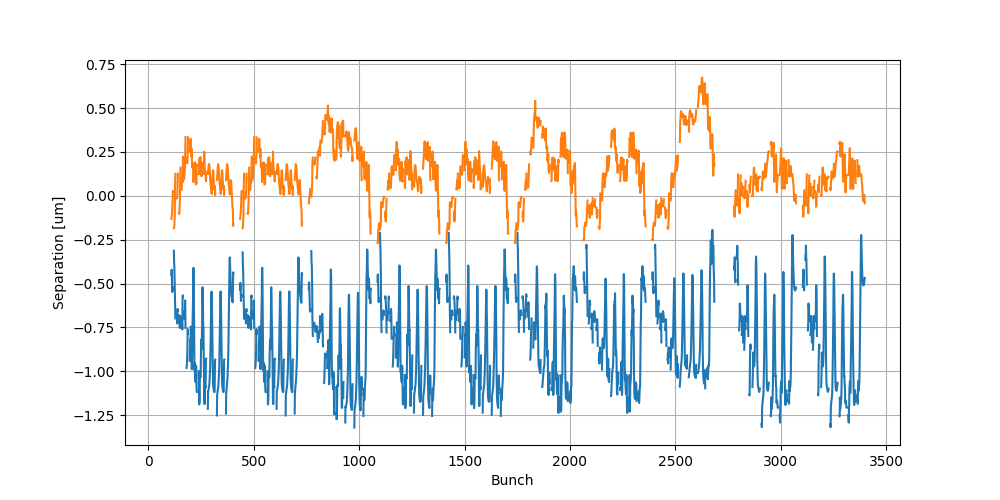

In [30]:
plt.figure(figsize=(10, 5))
plt.plot(co_b1_x*1e6-co_b2_x*1e6)
plt.plot(co_b1_y*1e6-co_b2_y*1e6)
plt.grid(True)
plt.ylabel('Separation [um]')
plt.xlabel('Bunch')
plt.show()

In [31]:
co_b1_px, co_b1_py = result.bunch_angles_b1('MKIP5')
co_b2_px, co_b2_py = result.bunch_angles_b2('MKIP5')

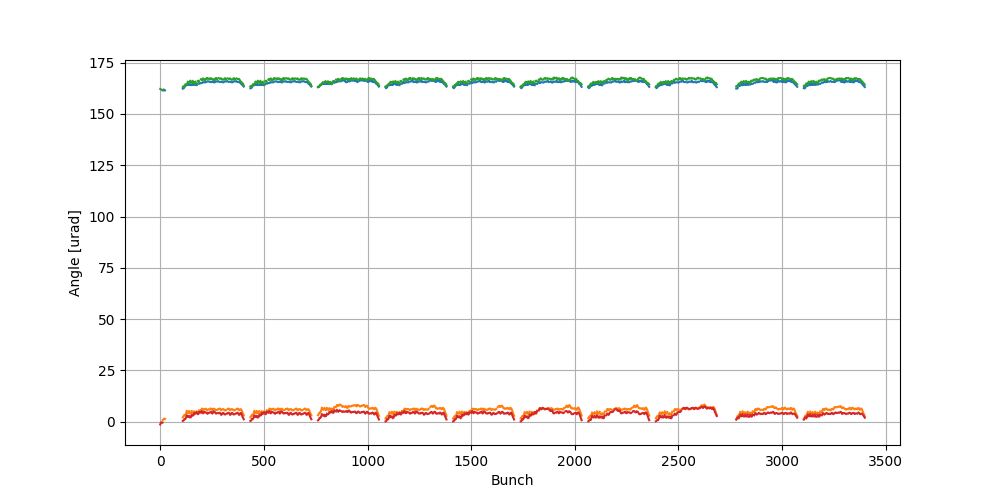

In [32]:
plt.figure(figsize=(10, 5))
plt.plot(co_b1_px*1e6)
plt.plot(co_b1_py*1e6)
plt.plot(co_b2_px*1e6)
plt.plot(co_b2_py*1e6)
plt.grid(True)
plt.ylabel('Angle [urad]')
plt.xlabel('Bunch')
plt.show()

In [33]:
qx1, qy1 = result.bunch_tunes_b1()
qx2, qy2 = result.bunch_tunes_b2()

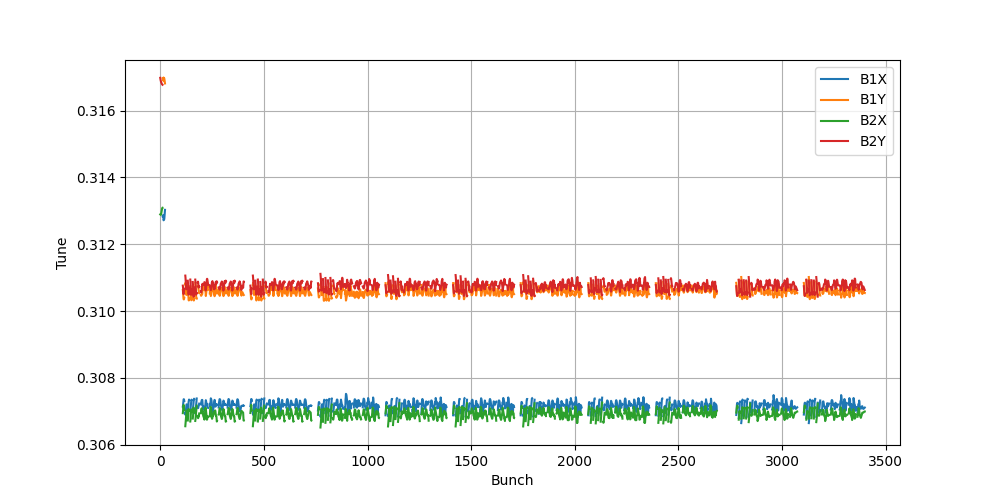

In [34]:
plt.figure(figsize=(10, 5))
plt.plot(qx1)
plt.plot(qy1)
plt.plot(qx2)
plt.plot(qy2)
plt.grid(True)
plt.ylabel('Tune')
plt.xlabel('Bunch')
plt.legend(['B1X', 'B1Y', 'B2X', 'B2Y'])
plt.show()

In [35]:
qpx1, qpy1 = result.bunch_chromas_b1()
qpx2, qpy2 = result.bunch_chromas_b2()

In [36]:
plt.figure(figsize=(10, 5))
plt.plot(qpx1)
plt.plot(qpy1)
plt.plot(qpx2)
plt.plot(qpy2)
plt.grid(True)
plt.ylabel('Chroma')
plt.xlabel('Bunch')
plt.legend(['B1X', 'B1Y', 'B2X', 'B2Y'])
plt.show()

In [37]:
co_b1_x, co_b1_y = result.bunch_positions_b1('TCP.D6L7.B1')
co_b2_x, co_b2_y = result.bunch_positions_b2('TCP.D6R7.B2')

In [38]:
plt.figure(figsize=(10, 5))
plt.plot(co_b1_x*1e6)
plt.plot(co_b1_y*1e6)
plt.plot(co_b2_x*1e6)
plt.plot(co_b2_y*1e6)
plt.grid(True)
plt.title('Beam position at TCP D')
plt.ylabel('Orbit [um]')
plt.xlabel('Bunch')
plt.show()